# Time Series Module 3: ARIMA Models and Forecasting

This notebook contains code for AR, MA, ARMA, ARIMA, and SARIMA models using Python's `statsmodels` library.

### Package Installation

Run the cell bello to install the required packages

In [38]:
# !pip install statsmodels pandas matplotlib numpy seaborn

In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.tsa.arima.model import ARIMA
# import sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(72)

In [40]:
def parser(x):
    return pd.to_datetime(x, format='%Y-%m-%d')

In [41]:
# Read data
raw_df = pd.read_csv('data/ice_cream.csv', parse_dates=['DATE'], index_col='DATE')

In [42]:
cropped_df = raw_df['2007':'2013']  # Crop data for the years 1980-1990

<Axes: xlabel='DATE'>

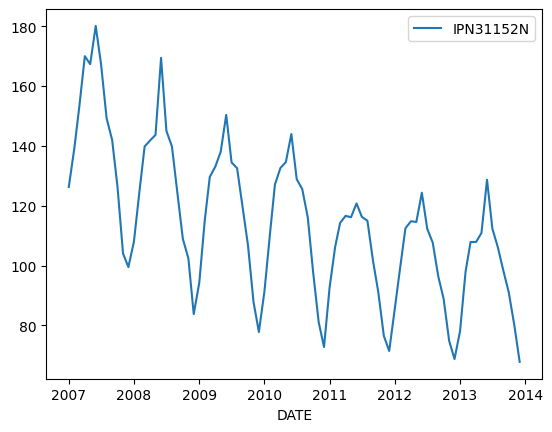

In [43]:
# Graph the data
sns.lineplot(cropped_df)

<Axes: xlabel='DATE'>

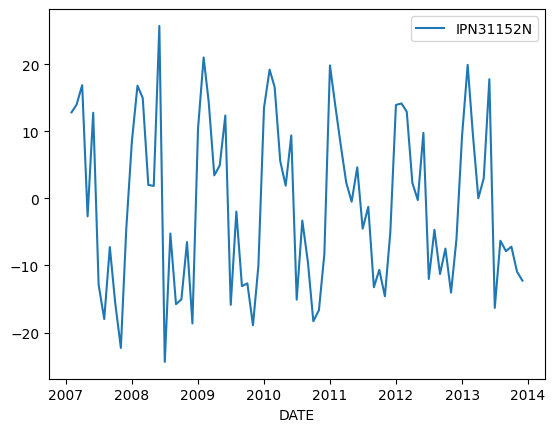

In [44]:
# Remove the trend
cropped_df_diff = cropped_df.diff().dropna()
sns.lineplot(cropped_df_diff)

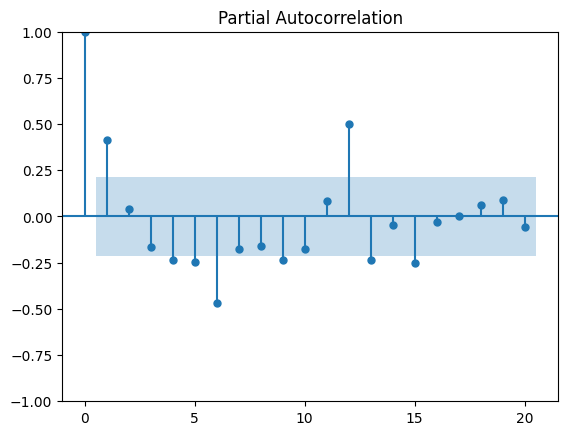

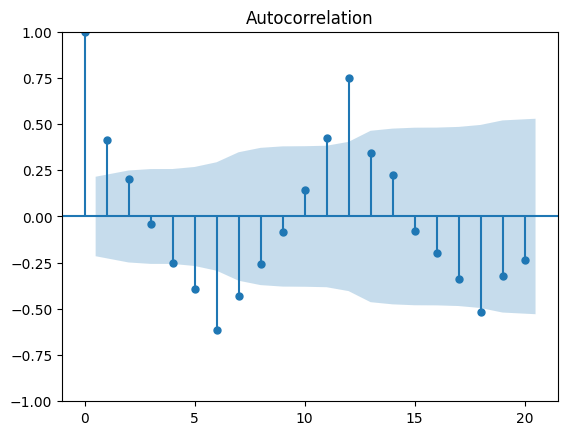

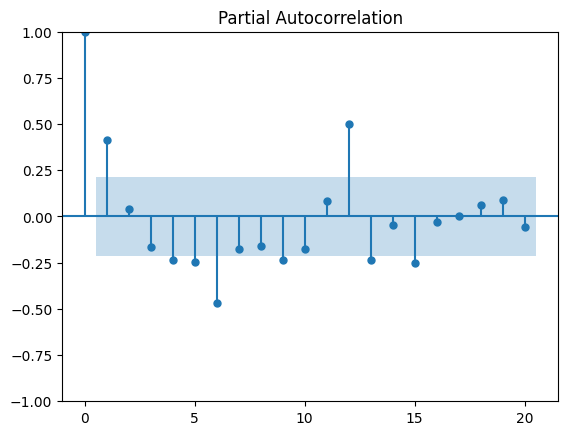

In [45]:
# plot ACF and PACF
plot_acf(cropped_df_diff, lags=20)
plot_pacf(cropped_df_diff, lags=20)

In [ ]:
# SARIMA Model Fitting and Fitted Values Cmparison
sarima_model = SARIMAX(cropped_df, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12)) # SARIMA(p=13, d=0, q=0)(P=1, D=1, Q=1, s=12)
sarima_model_fit = sarima_model.fit() # Fit the model

c:\Users\edgra\Amamya\02_University\03_Netlab\time-series-sop\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\edgra\Amamya\02_University\03_Netlab\time-series-sop\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              IPN31152N   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood                -261.123
Date:                                Sat, 25 Oct 2025   AIC                            536.245
Time:                                        11:08:33   BIC                            553.177
Sample:                                    01-01-2007   HQIC                           543.048
                                         - 12-01-2013                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4157      0.178      2.335      0.020       0.067       0.765
ma.L1         -0.7875      0.118     -6.680      0.000      -1.019      -0.556
ar.S.L6       -0.0578      0.060     -0.960      0.337      -0.176       0.060
ar.S.L12       0.9331      0.059     15.802      0.000       0.817       1.049
ma.S.L6        0.0404      0.177      0.228      0.820      -0.307       0.388
ma.S.L12      -0.4372      0.179     -2.443      0.015      -0.788      -0.086
sigma2        24.0093      3.968      6.051      0.000      16.233      31.786
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.87   Prob(JB):                         0.27
Heteroskedasticity (H):               0.27   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([13149., 13514., 13879., 14245., 14610., 14975., 15340., 15706.,
        16071.]),
 [Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009'),
  Text(14610.0, 0, '2010'),
  Text(14975.0, 0, '2011'),
  Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014')])

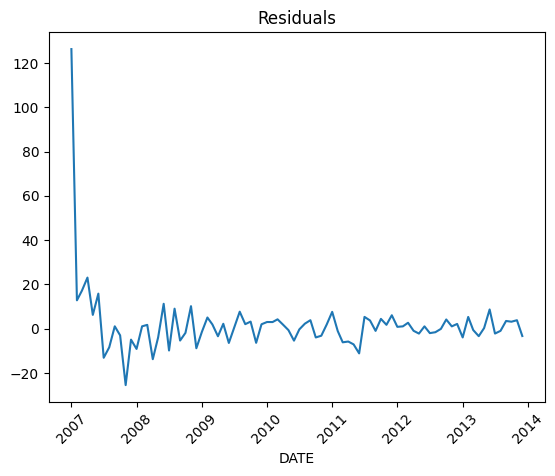

In [48]:
# finding residuals
fitted_values = sarima_model_fit.fittedvalues # Get fitted values (in-sample predictions)
df_est = pd.DataFrame({'Original': cropped_df['IPN31152N'], 'Fitted': fitted_values}) # Create DataFrame to compare original and fitted values

residuals = df_est['Original'] - df_est['Fitted']
sns.lineplot(residuals)
plt.title('Residuals')
plt.xticks(rotation=45)

(array([16071., 16130., 16191., 16252., 16314., 16375.]),
 [Text(16071.0, 0, '2014-01'),
  Text(16130.0, 0, '2014-03'),
  Text(16191.0, 0, '2014-05'),
  Text(16252.0, 0, '2014-07'),
  Text(16314.0, 0, '2014-09'),
  Text(16375.0, 0, '2014-11')])

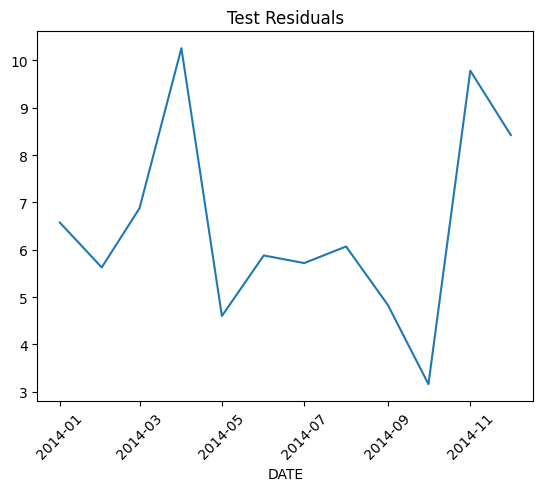

In [49]:
# Predict on test data
test_data = raw_df['2014':'2014']

predictions = sarima_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
test_residuals = test_data['IPN31152N'] - predictions

sns.lineplot(test_residuals)
plt.title('Test Residuals')
plt.xticks(rotation=45)

<Axes: xlabel='DATE', ylabel='IPN31152N'>

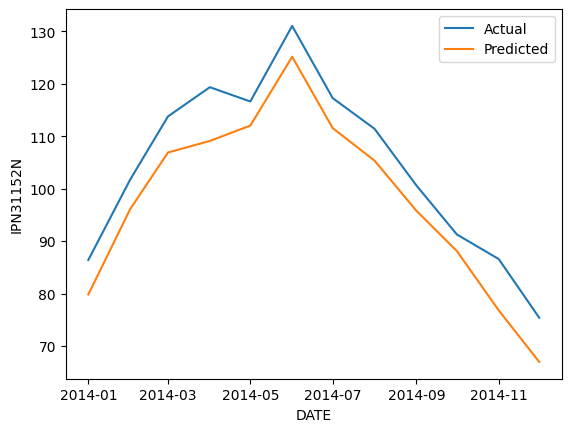

In [50]:
# Prediction vs Actuals
sns.lineplot(test_data['IPN31152N'], label='Actual')
sns.lineplot(predictions, label='Predicted')

In [51]:
# Mean Absolute Precent Error
mape = np.mean(np.abs(test_residuals / test_data['IPN31152N'])) * 100
print(f'Mean Absolute Percent Error (MAPE): {mape:.2f}%')

# Root Mean Squared Error
rmse = np.sqrt(np.mean(test_residuals**2))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Percent Error (MAPE): 6.44%
Root Mean Squared Error (RMSE): 6.79
